In [236]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import pandas
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [237]:
dataset_path = r"../Coursework Brief/Reuters-21578/Reuters-21578/reuters/reuters/reuters/training"
dataset_dirs = os.listdir(dataset_path)

In [238]:
with open(cat_file, 'r') as f:
    lines = f.readlines()

In [239]:
lines = ["".join(x.strip('\n').split(',')) for x in lines]

In [240]:
lines[0]

'test/14826 trade'

In [241]:
paths = []
cats = []

for line in lines:
    temp_line = line.split(' ')
    paths.append(temp_line[0])
    cats.append(temp_line[1])

In [242]:
paths[:5]

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833']

In [243]:
counts = pd.Series(cats).value_counts()


In [244]:
counts[:10]

earn            3937
acq             2312
crude            442
interest         424
money-fx         386
trade            377
ship             236
money-supply     160
wheat            149
sugar            136
Name: count, dtype: int64

In [245]:
sum(counts)

10788

In [246]:
total = 0
count = 0
for index,i in enumerate(counts):
    total = total + i
    if total/sum(counts) >= 0.8:
        count = index
        break
    print(i)

3937
2312
442
424
386
377
236
160
149
136


In [247]:
count

10

In [248]:
selected_cats = counts.index.to_list()[:10]

In [249]:
dataset_path = r"../Coursework Brief/Reuters-21578/Reuters-21578/reuters/reuters/reuters/"

data = []

for i in tqdm(paths):
    with open(f"{dataset_path}/{i}", 'r') as f:
        content = f.read()
        data.append(content)

100%|██████████| 10788/10788 [00:00<00:00, 16910.77it/s]


In [250]:
data[0]

'ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT\n  Mounting trade friction between the\n  U.S. And Japan has raised fears among many of Asia\'s exporting\n  nations that the row could inflict far-reaching economic\n  damage, businessmen and officials said.\n      They told Reuter correspondents in Asian capitals a U.S.\n  Move against Japan might boost protectionist sentiment in the\n  U.S. And lead to curbs on American imports of their products.\n      But some exporters said that while the conflict would hurt\n  them in the long-run, in the short-term Tokyo\'s loss might be\n  their gain.\n      The U.S. Has said it will impose 300 mln dlrs of tariffs on\n  imports of Japanese electronics goods on April 17, in\n  retaliation for Japan\'s alleged failure to stick to a pact not\n  to sell semiconductors on world markets at below cost.\n      Unofficial Japanese estimates put the impact of the tariffs\n  at 10 billion dlrs and spokesmen for major electronics firms\n  said they would v

In [251]:
df = pd.DataFrame(list(zip(data, cats)),
               columns =['Text', 'Category'])

In [252]:
df.head()

,Text,Category
0,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,trade
1,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,grain
2,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,nat-gas
3,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER\n ...,rubber
4,INDONESIA SEES CPO PRICE RISING SHARPLY\n Ind...,palm-oil


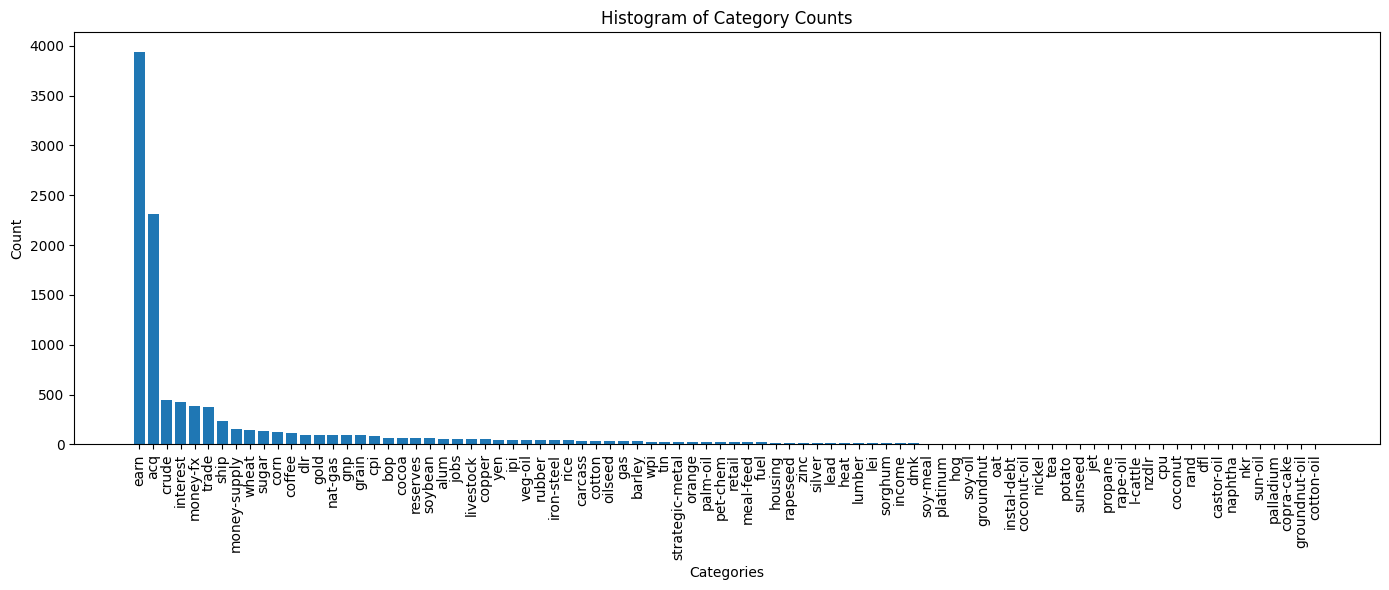

In [263]:
import matplotlib.pyplot as plt

# Assuming 'Category' is the column for which you want to plot the value counts
value_counts = df['Category'].value_counts()

# Creating a histogram from the value counts
plt.figure(figsize=(14, 6))  # Adjust the figure size if needed
plt.bar(value_counts.index, value_counts.values)
plt.title('Histogram of Category Counts')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [254]:
len(df['Category'].unique())

86

In [255]:
df_80 = df[df['Category'].isin(selected_cats)]

In [256]:
df_80.head()

,Text,Category
0,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,trade
5,AUSTRALIAN FOREIGN SHIP BAN ENDS BUT NSW PORTS...,ship
7,SRI LANKA GETS USDA APPROVAL FOR WHEAT PRICE\n...,wheat
9,SUMITOMO BANK AIMS AT QUICK RECOVERY FROM MERG...,acq
11,BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TEND...,interest
